In [1]:
from requests import get
from bs4 import BeautifulSoup
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from wordcloud import WordCloud


import acquire_cindy as a
import acquire as acq
import prepare_cindy as prep

# Acquire

we are using the function in acquire.py to get a repo.

**Note : the repo name should not contain spaces**

In [2]:
# repo_json_file = 'data2.json'
# df_github = pd.read_json(repo_json_file)

In [3]:
# df_github

In [4]:
#  df_github.to_csv('df.csv')

In [5]:
df = pd.read_csv('df.csv', index_col=0)

In [6]:
df

,repo,language,readme_contents
0,SJang1/korea-covid-19-remaining-vaccine-macro,Python,# korea-covid-19-remaining-vaccine-macro\n잔여백신...
1,jtleek/datasharing,NaN,How to share data with a statistician\n=======...
2,rdpeng/ProgrammingAssignment2,R,### Introduction\n\nThis second programming as...
3,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...
4,tensorflow/tensorflow,C++,"<div align=""center"">\n <img src=""https://www...."
5,SmartThingsCommunity/SmartThingsPublic,Groovy,# SmartThings Public GitHub Repo\n\nAn officia...
6,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot..."


# Prepare

in this section we are going to clean data:
- detect english language so we can have only information in english language (remove rows)
- check missing values. remove rows
- use my function that clean, steem

## detect language

In [7]:
df.readme_contents[0]

'# korea-covid-19-remaining-vaccine-macro\n잔여백신 지도 API로 남은 백신 수를 확인하고, 잔여백신이 있는 경우 잔여백신 예약 페이지로 이동합니다.\n\n## 카카오 잔여백신 예약\n### 이용방법\n1. Chrome 브라우저를 이용하여 모든 작업을 진행하므로, 크롬 브라우저를 실행해주세요.\n2. [카카오 계정 로그인 페이지](https://accounts.kakao.com/login?continue=https%3A%2F%2Fvaccine-map.kakao.com%2Fmap2%3Fv%3D1) 에 접근하여 카카오 로그인을 합니다. [로그인 시 주의사항](https://github.com/SJang1/korea-covid-19-remaining-vaccine-macro/issues/82)\n3. [#2](https://github.com/SJang1/korea-covid-19-remaining-vaccine-macro/discussions/2)를 보고 잔여백신을 검색할 범위의 좌표값을 찾습니다.\n4. [Release 페이지](https://github.com/SJang1/korea-covid-19-remaining-vaccine-macro/releases/latest)에서 본인의 운영체제에 맞는 파일을 다운로드 받고 실행합니다.\n5. 사용자 권한 동의를 요청하면 승인해주세요. 자동으로 검색 및 예약시도를 진행합니다.\n6. 예약 성공 시 빵빠레 소리와 함께 예약이 성공했음이 안내됩니다.\n\n### 주의사항\n- 예약 시도 후에는 자동 예약 프로그램은 정지됩니다.\n- 예약 시도가 반드시 성공 한다는 보장이 없습니다.\n- 예약 시도 후에는 다시 시도 할 경우 처음부터 다시 시작하셔야합니다.\n- 프로그램을 한두개만 띄우시기 바랍니다. 과도하게 많이 실행하는 경우 카카오 계정이 정지될 수 있습니다.\n\n### 다운로드 팁\n- Actions 탭에서 master을 바로 실행 가능한 파일로 변환한 파일을 받을 수 있습니다. 

install :
```
$ pip install -U textblob
$ python -m textblob.download_corpora
```
https://textblob.readthedocs.io/en/dev/install.html

In [8]:
from textblob import TextBlob
text = df.readme_contents[0]
lang = TextBlob(text)
print(lang.detect_language())


ko


In [9]:
lang.detect_language()

'ko'

In [10]:
df

,repo,language,readme_contents
0,SJang1/korea-covid-19-remaining-vaccine-macro,Python,# korea-covid-19-remaining-vaccine-macro\n잔여백신...
1,jtleek/datasharing,NaN,How to share data with a statistician\n=======...
2,rdpeng/ProgrammingAssignment2,R,### Introduction\n\nThis second programming as...
3,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...
4,tensorflow/tensorflow,C++,"<div align=""center"">\n <img src=""https://www...."
5,SmartThingsCommunity/SmartThingsPublic,Groovy,# SmartThings Public GitHub Repo\n\nAn officia...
6,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot..."


In [11]:
# for n in range (0, len(df)):
#     text = df.readme_contents[n]
#     lang = TextBlob(text)
#     print(lang.detect_language())
#     if lang.detect_language() != 'en':
#         df =df.drop([n])
    

In [12]:
df

,repo,language,readme_contents
0,SJang1/korea-covid-19-remaining-vaccine-macro,Python,# korea-covid-19-remaining-vaccine-macro\n잔여백신...
1,jtleek/datasharing,NaN,How to share data with a statistician\n=======...
2,rdpeng/ProgrammingAssignment2,R,### Introduction\n\nThis second programming as...
3,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...
4,tensorflow/tensorflow,C++,"<div align=""center"">\n <img src=""https://www...."
5,SmartThingsCommunity/SmartThingsPublic,Groovy,# SmartThings Public GitHub Repo\n\nAn officia...
6,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot..."


In [13]:
#create a function
def remove_nonenglish (df):
    '''
    takes in df and 1 column to check if the text is in englis if not that row is going to be remove
    '''
    for n in range (0, len(df)):
        text = df.readme_contents[n]
        lang = TextBlob(text)
        print(lang.detect_language())
        if lang.detect_language() != 'en':
            df =df.drop([n])
    return df

In [14]:
df = remove_nonenglish(df)

ko
en
en
en
en
en
en


In [15]:
df

,repo,language,readme_contents
1,jtleek/datasharing,NaN,How to share data with a statistician\n=======...
2,rdpeng/ProgrammingAssignment2,R,### Introduction\n\nThis second programming as...
3,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...
4,tensorflow/tensorflow,C++,"<div align=""center"">\n <img src=""https://www...."
5,SmartThingsCommunity/SmartThingsPublic,Groovy,# SmartThings Public GitHub Repo\n\nAn officia...
6,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot..."


### missing values

In [16]:
#check missing values using my function
miss_val =prep.miss_dup_values(df)
miss_val

Your selected dataframe has 3 columns.
There are 1 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values
language,1,16.7


**Note:  we can see we have missing values in language , so I'm going to remove the rows that have missing values in language**

In [17]:
#removing missing values
df = df.dropna(axis=0).reset_index(drop=True)

### clean, tokenized, stemming, lemmatize

In [18]:
#use my prepare function
df =prep.prepare_data(df, 'readme_contents')

In [19]:
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
0,rdpeng/ProgrammingAssignment2,R,### Introduction\n\nThis second programming as...,introduction second programming assignment req...,introduct second program assign requir write r...,introduction second programming assignment req...
1,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...,well hello repository meant provide example fo...,well hello repositori meant provid exampl fork...,well hello repository meant provide example fo...
2,tensorflow/tensorflow,C++,"<div align=""center"">\n <img src=""https://www....",div aligncenter img srchttpswwwtensorfloworgim...,div aligncent img srchttpswwwtensorfloworgimag...,div aligncenter img srchttpswwwtensorfloworgim...
3,SmartThingsCommunity/SmartThingsPublic,Groovy,# SmartThings Public GitHub Repo\n\nAn officia...,smartthings public github repo official list s...,smartth public github repo offici list smartap...,smartthings public github repo official list s...
4,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...",p aligncenter hrefhttpsgetbootstrapcom img src...,p aligncent hrefhttpsgetbootstrapcom img srcht...,p aligncenter hrefhttpsgetbootstrapcom img src...


___________

## MAIN FUNCTION FOR PREPARE

In [20]:
def prepare_mf (df):
    '''
    takes in a df and all the rows with missing information, non English text,
    and then clean, tokenize, stemming, lemmatize
    '''
    #removing texts that are not English
    df = remove_nonenglish(df)
    #removing all missing values
    #removing missing values
    df = df.dropna(axis=0).reset_index(drop=True)
    #use my prepare function to  clean, tokenized, stemming, lemmatize
    df =prep.prepare_data(df, 'readme_contents')
    return df
    
    
    
    

In [21]:
#acquire data
df = pd.read_csv('df.csv', index_col=0)

In [22]:
#prepare data
df =prep.prepare_mf(df)

In [23]:
df

,repo,language,readme_contents,clean,stemmed,lemmatized
1,rdpeng/ProgrammingAssignment2,R,### Introduction\n\nThis second programming as...,introduction second programming assignment req...,introduct second program assign requir write r...,introduction second programming assignment req...
2,octocat/Spoon-Knife,HTML,### Well hello there!\n\nThis repository is me...,well hello repository meant provide example fo...,well hello repositori meant provid exampl fork...,well hello repository meant provide example fo...
3,tensorflow/tensorflow,C++,"<div align=""center"">\n <img src=""https://www....",div aligncenter img srchttpswwwtensorfloworgim...,div aligncent img srchttpswwwtensorfloworgimag...,div aligncenter img srchttpswwwtensorfloworgim...
4,SmartThingsCommunity/SmartThingsPublic,Groovy,# SmartThings Public GitHub Repo\n\nAn officia...,smartthings public github repo official list s...,smartth public github repo offici list smartap...,smartthings public github repo official list s...
5,twbs/bootstrap,JavaScript,"<p align=""center"">\n <a href=""https://getboot...",p aligncenter hrefhttpsgetbootstrapcom img src...,p aligncent hrefhttpsgetbootstrapcom img srcht...,p aligncenter hrefhttpsgetbootstrapcom img src...


_____________

# acquire big data

In [24]:
# repo_json_file = 'data2.json'
# df_github = pd.read_json(repo_json_file)

In [25]:
# df_github.head()

In [26]:
# df_github.shape

In [27]:
# df_github.to_csv('git_urls.csv')

In [28]:
df = pd.read_csv('git_urls.csv', index_col=0)

In [29]:
df.shape

(100, 3)

In [30]:
df.head()

,repo,language,readme_contents
0,mojombo/grit,Ruby,Grit\n====\n\n**Grit is no longer maintained. ...
1,wycats/merb-core,Ruby,merb-core and merb-more have been merged into ...
2,rubinius/rubinius,C,[![Gitter](https://badges.gitter.im/Join%20Cha...
3,mojombo/god,Ruby,God: The Ruby Framework for Process Management...
4,vanpelt/jsawesome,JavaScript,Jsawesome\n\nDescription:\n JSAwesome provi...


In [31]:
prep.miss_dup_values(df)

Your selected dataframe has 3 columns.
There are 2 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values
readme_contents,16,16.0
language,4,4.0


In [32]:
df =prep.prepare_mf(df)

In [33]:
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized
0,mojombo/grit,Ruby,Grit\n====\n\n**Grit is no longer maintained. ...,grit grit longer maintained check ruggedhttpsg...,grit grit longer maintain check ruggedhttpsgit...,grit grit longer maintained check ruggedhttpsg...
1,wycats/merb-core,Ruby,merb-core and merb-more have been merged into ...,merbcore merbmore merged httpgithubcomwycatsmerb,merbcor merbmor merg httpgithubcomwycatsmerb,merbcore merbmore merged httpgithubcomwycatsmerb
2,rubinius/rubinius,C,[![Gitter](https://badges.gitter.im/Join%20Cha...,gitterhttpsbadgesgitterimjoin20chatsvghttpsgit...,gitterhttpsbadgesgitterimjoin20chatsvghttpsgit...,gitterhttpsbadgesgitterimjoin20chatsvghttpsgit...
3,mojombo/god,Ruby,God: The Ruby Framework for Process Management...,god ruby framework process management authors ...,god rubi framework process manag author tom pr...,god ruby framework process management author t...
4,vanpelt/jsawesome,JavaScript,Jsawesome\n\nDescription:\n JSAwesome provi...,jsawesome description jsawesome provides power...,jsawesom descript jsawesom provid power json b...,jsawesome description jsawesome provides power...


In [34]:
prep.miss_dup_values(df)

Your selected dataframe has 6 columns.
There are 0 columns that have missing values.
  
** There are 0 duplicate rows that represents 0.0% of total Values**


,Missing Values,% of Total Values


In [35]:
df.shape

(80, 6)

# Explore

Explore the data that you have scraped. Here are some ideas for exploration:

- What are the most common words in READMEs?
- What does the distribution of IDFs look like for the most common words?
- Does the length of the README vary by programming language?
- Do different programming languages use a different number of unique words?


### - What are the most common words in READMEs?

In [36]:
df.language.value_counts()

Ruby          65
JavaScript     8
Erlang         2
C              2
Python         1
Io             1
Emacs Lisp     1
Name: language, dtype: int64

In [37]:
#get the list of languages
list_lang = list(df.language.value_counts().index)

In [38]:
#joint all the text of each language
join_text ={}
for language in list_lang :
    join_text[language] = prep.basic_clean(' '.join(df[df.language == language].lemmatized))

#add allwords
join_text['all_words']= prep.basic_clean(' '.join(df.lemmatized))



In [39]:
#check if we have all the languages
join_text.keys()

dict_keys(['Ruby', 'JavaScript', 'Erlang', 'C', 'Python', 'Io', 'Emacs Lisp', 'all_words'])

In [40]:
#join_text['Ruby']

In [41]:
pd.Series(join_text['Ruby'].split()).value_counts()

9                                                           252
ruby                                                        177
end                                                         166
file                                                        143
use                                                         134
                                                           ... 
mock                                                          1
uploadcolumnrenderhelperrenderimage                           1
yxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxyy      1
availability                                                  1
forgerynamemalefirstname                                      1
Length: 5128, dtype: int64

In [42]:
join_text.keys()

dict_keys(['Ruby', 'JavaScript', 'Erlang', 'C', 'Python', 'Io', 'Emacs Lisp', 'all_words'])

**Represent text as word frequencies.**

In [43]:
word_counts= pd.DataFrame()
for lang in join_text:
    word_counts[lang] = pd.Series(join_text[lang].split()).value_counts()
word_counts= word_counts.fillna(0).astype(int)

In [44]:
word_counts.sort_values('all_words', ascending=False).head(30)

,Ruby,JavaScript,Erlang,C,Python,Io,Emacs Lisp,all_words
9,252,0,6,0,0,0,0,258
ruby,177,6,0,26,0,0,0,209
end,166,0,2,13,0,0,0,181
file,143,0,14,8,2,0,5,172
use,134,12,0,8,1,0,1,156
class,109,15,0,6,0,0,0,130
object,89,8,0,25,0,0,0,122
install,90,1,18,9,1,0,0,119
version,109,0,0,5,0,0,0,114
gem,109,0,0,5,0,0,0,114


In [45]:
#vizualizacion most frequet words
def word_cloud (text):

    plt.figure(figsize=(10,10))
    img = WordCloud(background_color='white', width=800, height=600).generate(text)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

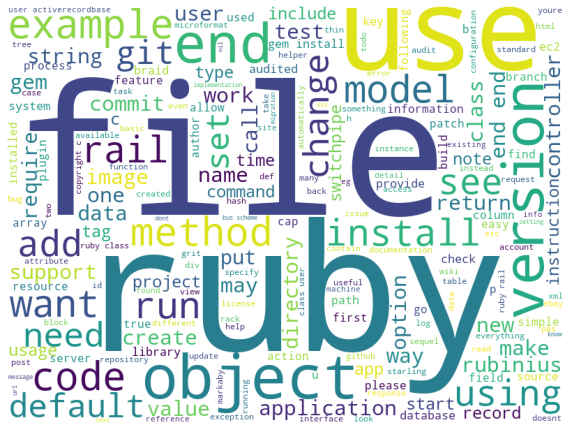

In [46]:
word_cloud(join_text['all_words'])

In [47]:
#what if I do only 30 words?
top_all =word_counts.sort_values('all_words', ascending=False)[['all_words']].head(30)

In [48]:
top_all

,all_words
9,258
ruby,209
end,181
file,172
use,156
class,130
object,122
install,119
version,114
gem,114


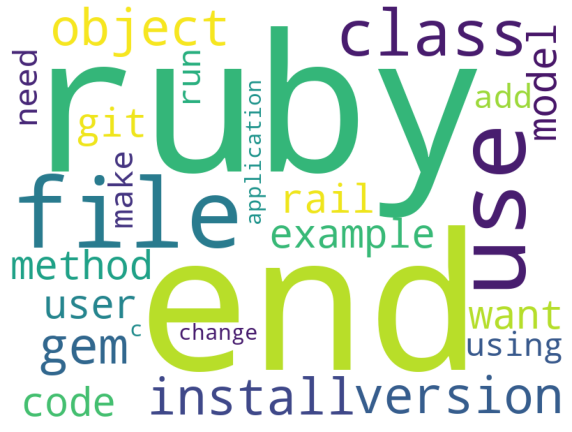

In [49]:
word_cloud(' '.join(top_all.index))

In [50]:
def wordcloud_top(df,column, n_top=30):
    top_all =df.sort_values(column, ascending=False)[[column]].head(n_top)
    word_cloud(' '.join(top_all.index))
    

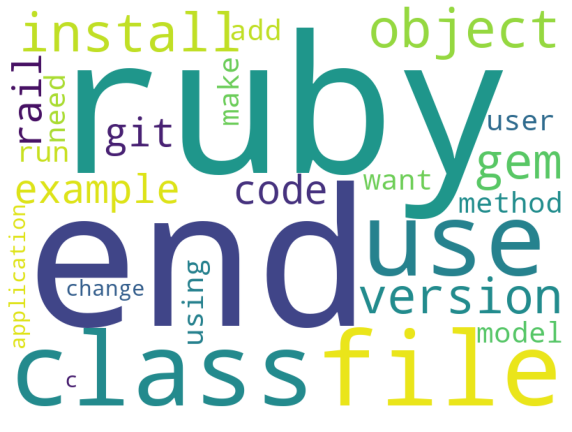

In [51]:
wordcloud_top(word_counts, 'all_words')

 ********************* Language : Ruby *********************


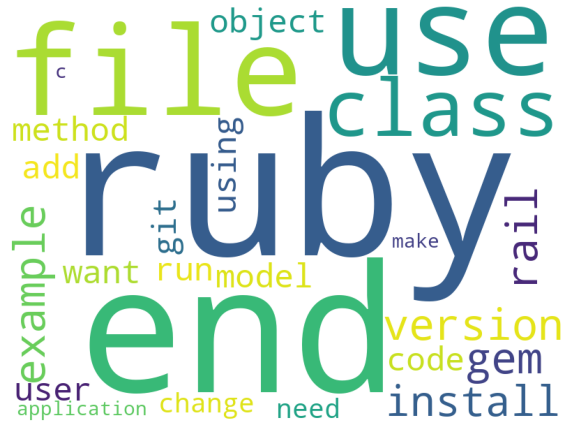

 
 ********************* Language : JavaScript *********************


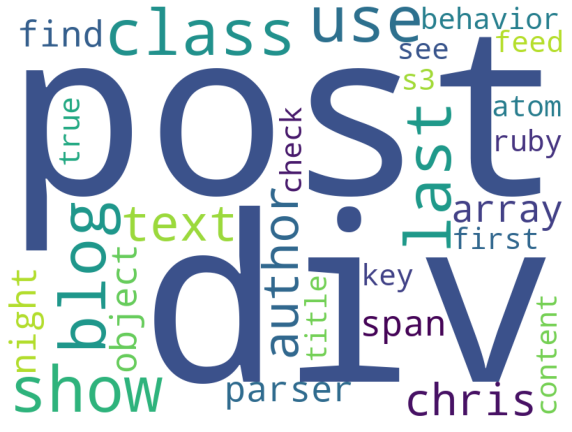

 
 ********************* Language : Erlang *********************


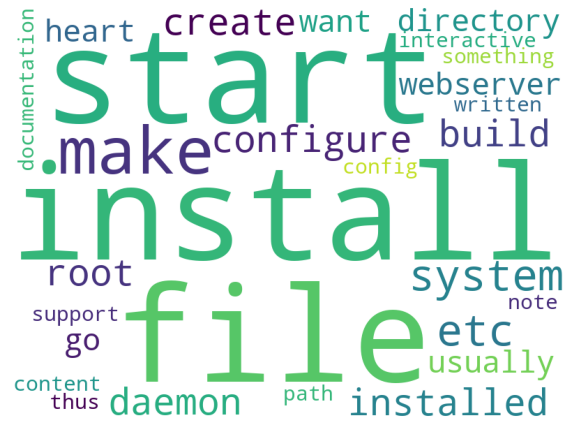

 
 ********************* Language : C *********************


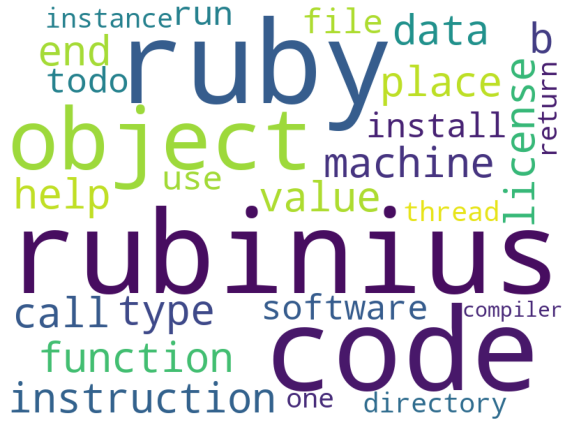

 
 ********************* Language : Python *********************


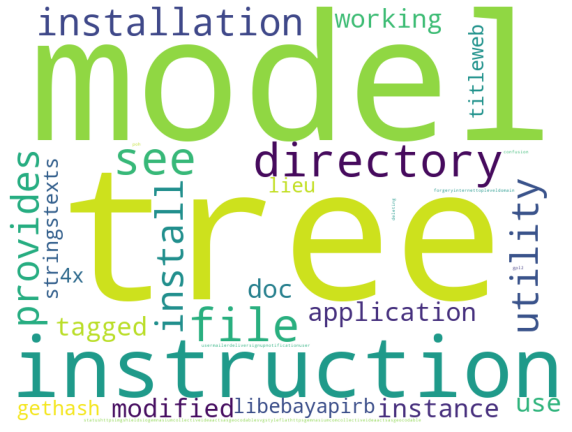

 
 ********************* Language : Io *********************


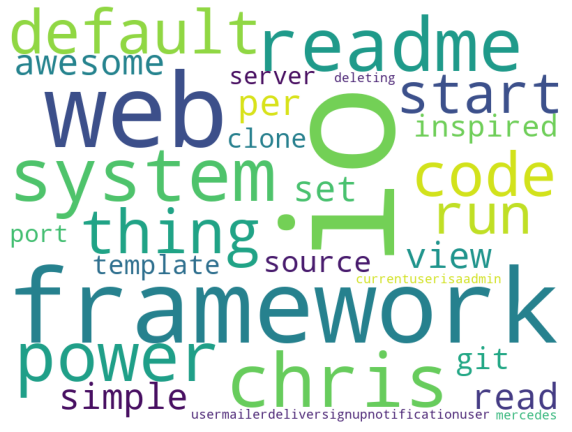

 
 ********************* Language : Emacs Lisp *********************


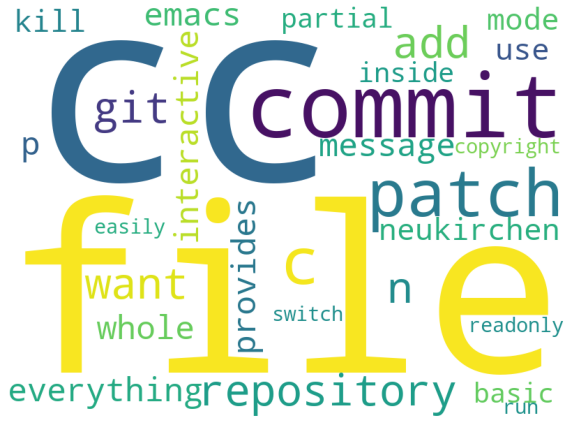

 
 ********************* Language : all_words *********************


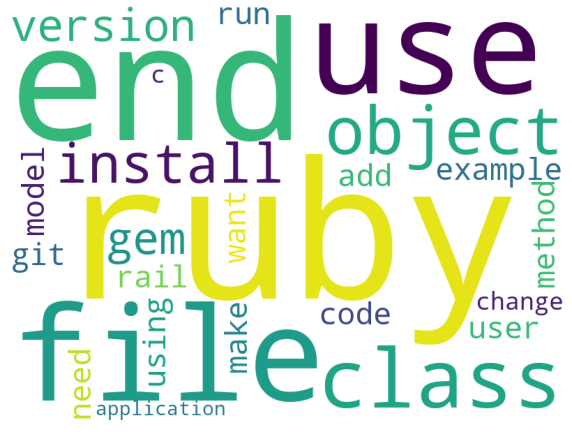

In [52]:
for col in word_counts.columns:
    print (f' ********************* Language : {col} *********************')
    wordcloud_top(word_counts, col)
    print(' ')

**- What does the distribution of IDFs look like for the most common words?**

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [54]:
# # our 3 example documents
# documents = {
#     'news': 'Codeup announced last thursday that they just launched a new data science program. It is 18 weeks long.',
#     'description': 'Codeup\'s data science program teaches hands on skills using Python and pandas.',
#     'context': 'Codeup\'s data science program was created in response to a percieved lack of data science talent, and growing demand.'
# }
# print(documents)

# print('\nCleaning and lemmatizing...\n')

# documents = {topic: prep.lemmatize(prep.basic_clean(documents[topic])) for topic in documents}



In [55]:
# documents

In [56]:
# # A simple way to calculate idf for demonstration. Note that this
# # function relies on the globally defined documents variable.
# def idf(word):
#     n_occurences = sum([1 for doc in documents.values() if word in doc])
#     return len(documents) / n_occurences

# # Get a list of the unique words
# unique_words = pd.Series(' '.join(documents.values()).split()).unique()

# # put the unique words into a data frame
# (pd.DataFrame(dict(word=unique_words))
#  # calculate the idf for each word
#  .assign(idf=lambda df: df.word.apply(idf))
#  # sort the data for presentation purposes
#  .set_index('word')
#  .sort_values(by='idf', ascending=False)
#  .head(5))

In [57]:
# # Get a list of the unique words
# pd.Series(' '.join(documents.values()).split()).unique()

In [58]:
#len(documents)

In [59]:
len(join_text)

8

In [60]:
join_text.pop("all_words")

'grit grit longer maintained check ruggedhttpsgithubcomlibgit2rugged grit give object oriented readwrite access git repository via ruby main goal stability performance end interaction git repository done shelling system git command interaction done pure ruby reimplementations core git functionality choice however transparent end user need know method used software developed power github considered production ready extensive test suite provided verify correctness grit maintained tom prestonwerner scott chacon chris wanstrath pj hyett documentation accurate grit 23 requirement git httpgitscmcom tested 1721 install easiest install via rubygems gem install grit source grit git repo available github browsed httpgithubcommojombogrit cloned git clone gitgithubcommojombogritgit development need gem get test pas mocha contributing youd like hack grit follow instruction get dependency install gem first 1 fork project account 1 clone fork 1 create thoughtfully named topic branch contain change 1 

In [61]:
join_text.keys()

dict_keys(['Ruby', 'JavaScript', 'Erlang', 'C', 'Python', 'Io', 'Emacs Lisp'])

In [62]:
def idf(word):
    n_occurences = sum([1 for doc in join_text.values() if word in doc])
    return len(join_text) / n_occurences

In [63]:
# Get a list of the unique words
unique_words = pd.Series(' '.join(join_text.values()).split()).unique()

In [64]:
len(unique_words)

5766

In [65]:
#let's check a single word
idf('ruby')

2.3333333333333335

In [66]:
n_occurences = sum([1 for doc in join_text.values() if 'ruby' in doc])
len(join_text) / n_occurences

2.3333333333333335

In [67]:
#  how many texts  the word is in 
n_occurences

3

In [68]:
#total of texts 
len(join_text)

7

In [69]:
# put the unique words into a data frame
un_df =(pd.DataFrame(dict(word=unique_words))

 # calculate the idf for each word
.assign(idf=lambda df: df.word.apply(idf))
 # sort the data for presentation purposes
 .set_index('word')
 .sort_values(by='idf', ascending=False))


In [70]:
#these are the words tht are only in one type of language text
un_df[un_df.idf==7]

,idf
word,
grit,7.0
c100x100,7.0
picturesepiatonedprocess,7.0
picturesolarizedprocess,7.0
sepiatoned,7.0
...,...
inspection,7.0
gremove,7.0
amazonec2,7.0


In [71]:
len(un_df[un_df.idf==7])

4552

In [72]:
len(un_df)

5766

In [73]:
#we can see
len(un_df[un_df.idf==7]) /len(un_df)

0.7894554283732224

In [74]:
#almost 79 % of the unique words are in one language text

**- Does the length of the README vary by programming language?**

In [75]:
df['readme_length'] = df.lemmatized.apply(len)

In [76]:
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized,readme_length
0,mojombo/grit,Ruby,Grit\n====\n\n**Grit is no longer maintained. ...,grit grit longer maintained check ruggedhttpsg...,grit grit longer maintain check ruggedhttpsgit...,grit grit longer maintained check ruggedhttpsg...,4455
1,wycats/merb-core,Ruby,merb-core and merb-more have been merged into ...,merbcore merbmore merged httpgithubcomwycatsmerb,merbcor merbmor merg httpgithubcomwycatsmerb,merbcore merbmore merged httpgithubcomwycatsmerb,48
2,rubinius/rubinius,C,[![Gitter](https://badges.gitter.im/Join%20Cha...,gitterhttpsbadgesgitterimjoin20chatsvghttpsgit...,gitterhttpsbadgesgitterimjoin20chatsvghttpsgit...,gitterhttpsbadgesgitterimjoin20chatsvghttpsgit...,12034
3,mojombo/god,Ruby,God: The Ruby Framework for Process Management...,god ruby framework process management authors ...,god rubi framework process manag author tom pr...,god ruby framework process management author t...,488
4,vanpelt/jsawesome,JavaScript,Jsawesome\n\nDescription:\n JSAwesome provi...,jsawesome description jsawesome provides power...,jsawesom descript jsawesom provid power json b...,jsawesome description jsawesome provides power...,515


In [77]:
df.groupby('language').readme_length.mean()



language
C             6488.000000
Emacs Lisp     647.000000
Erlang        1648.000000
Io             432.000000
JavaScript    1412.500000
Python         230.000000
Ruby          2503.707692
Name: readme_length, dtype: float64

<AxesSubplot:ylabel='Frequency'>

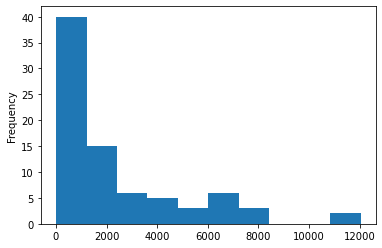

In [78]:
df.readme_length.plot.hist()

In [79]:
df['word_count'] = df.lemmatized.apply(prep.basic_clean).apply(str.split).apply(len)

In [80]:
df.head()

,repo,language,readme_contents,clean,stemmed,lemmatized,readme_length,word_count
0,mojombo/grit,Ruby,Grit\n====\n\n**Grit is no longer maintained. ...,grit grit longer maintained check ruggedhttpsg...,grit grit longer maintain check ruggedhttpsgit...,grit grit longer maintained check ruggedhttpsg...,4455,489
1,wycats/merb-core,Ruby,merb-core and merb-more have been merged into ...,merbcore merbmore merged httpgithubcomwycatsmerb,merbcor merbmor merg httpgithubcomwycatsmerb,merbcore merbmore merged httpgithubcomwycatsmerb,48,4
2,rubinius/rubinius,C,[![Gitter](https://badges.gitter.im/Join%20Cha...,gitterhttpsbadgesgitterimjoin20chatsvghttpsgit...,gitterhttpsbadgesgitterimjoin20chatsvghttpsgit...,gitterhttpsbadgesgitterimjoin20chatsvghttpsgit...,12034,1572
3,mojombo/god,Ruby,God: The Ruby Framework for Process Management...,god ruby framework process management authors ...,god rubi framework process manag author tom pr...,god ruby framework process management author t...,488,59
4,vanpelt/jsawesome,JavaScript,Jsawesome\n\nDescription:\n JSAwesome provi...,jsawesome description jsawesome provides power...,jsawesom descript jsawesom provid power json b...,jsawesome description jsawesome provides power...,515,50


<Figure size 1080x720 with 0 Axes>

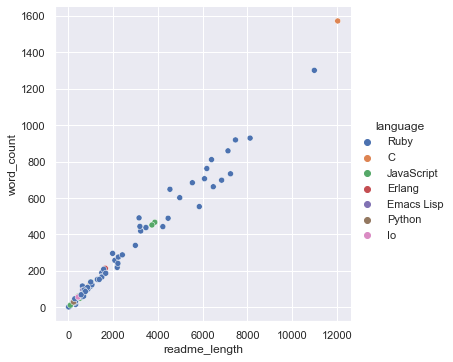

In [90]:


plt.figure(figsize= (15,10))
sns.relplot(data=df, y='word_count', x='readme_length', hue='language')
#plt.rc('figure',figsize=(10,10))
plt.show()

In [91]:
df.groupby('language').word_count.mean()

language
C             846.000000
Emacs Lisp     95.000000
Erlang        214.000000
Io             57.000000
JavaScript    171.750000
Python         29.000000
Ruby          296.969231
Name: word_count, dtype: float64

In [92]:
df.groupby('language').word_count.median()

language
C             846
Emacs Lisp     95
Erlang        214
Io             57
JavaScript     96
Python         29
Ruby          166
Name: word_count, dtype: int64